In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [26]:
# 1. Generate or Load Data
# Example using dummy data:
np.random.seed(42)  # for reproducibility
n_samples = 100
n_features = 10
X = np.random.rand(n_samples, n_features)
y = 2 * X[:, 0] + 0.5 * X[:, 1] - 1.5 * X[:, 2] + np.random.randn(n_samples) * 0.5  # Linear relationship with some noise

In [27]:
X

array([[0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
        0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258],
       [0.02058449, 0.96990985, 0.83244264, 0.21233911, 0.18182497,
        0.18340451, 0.30424224, 0.52475643, 0.43194502, 0.29122914],
       [0.61185289, 0.13949386, 0.29214465, 0.36636184, 0.45606998,
        0.78517596, 0.19967378, 0.51423444, 0.59241457, 0.04645041],
       [0.60754485, 0.17052412, 0.06505159, 0.94888554, 0.96563203,
        0.80839735, 0.30461377, 0.09767211, 0.68423303, 0.44015249],
       [0.12203823, 0.49517691, 0.03438852, 0.9093204 , 0.25877998,
        0.66252228, 0.31171108, 0.52006802, 0.54671028, 0.18485446],
       [0.96958463, 0.77513282, 0.93949894, 0.89482735, 0.59789998,
        0.92187424, 0.0884925 , 0.19598286, 0.04522729, 0.32533033],
       [0.38867729, 0.27134903, 0.82873751, 0.35675333, 0.28093451,
        0.54269608, 0.14092422, 0.80219698, 0.07455064, 0.98688694],
       [0.77224477, 0.19871568, 0.0055221

In [28]:
y

array([ 2.15296979e-01, -1.39021223e+00,  1.04533467e+00,  1.50806725e+00,
        7.19977367e-01,  1.45787762e+00,  8.68839088e-02,  1.86515424e+00,
        1.50642602e+00, -1.37584715e+00,  1.24338715e-01, -6.30589085e-01,
        1.72171017e+00,  1.27703573e-01,  7.64384709e-01,  2.24554684e+00,
        8.16470377e-02,  9.36033399e-01, -6.34011777e-01, -7.00935601e-01,
        1.55283211e+00,  2.07450924e-01,  1.50692832e+00,  7.44447682e-01,
        7.68336758e-01, -6.49844421e-01,  1.62598224e+00,  4.83796220e-01,
        2.01351190e+00, -1.60152990e+00, -5.35347746e-01,  6.59279388e-01,
        1.18894417e+00,  1.16755557e+00,  1.47608710e+00, -2.96303196e-01,
        5.44129759e-01,  5.13817872e-01, -3.17574038e-01,  2.16203218e+00,
       -3.58998593e-01,  3.92421258e-01,  2.99060707e+00, -4.42007695e-01,
       -1.21162237e-01,  1.92385518e+00,  2.30376399e-01,  1.83078481e-01,
        7.14766615e-01,  6.64415726e-01,  5.27854931e-01, -4.22466788e-01,
       -5.78235121e-01,  

In [29]:
# Alternatively, load data from a file (e.g., CSV):
# data = pd.read_csv("your_data.csv")
# X = data.drop("target_variable", axis=1)  # Features
# y = data["target_variable"]  # Target variable


# 2. Data Preprocessing (Optional, but often important)
#   - Scaling/Normalization:  Can improve Lasso performance significantly
#   - Handling missing values:  Impute or remove
#   - Encoding categorical features: Use one-hot encoding or other methods

# Example of scaling using StandardScaler:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X) # important to fit on the training set and transform on test

In [30]:
# 3. Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% training, 20% testing

In [31]:
# 4. Train the Lasso Regression Model
#  - `alpha`:  The regularization strength. Higher values penalize larger coefficients more strongly.
#  - `fit_intercept`:  Whether to calculate the intercept for this model. Defaults to True.
#  - `normalize` (deprecated in sklearn 1.2):  Instead, use StandardScaler or similar. (We did that above)
#  - `max_iter`: Maximum number of iterations for the solver to converge.  Increase if you get a "convergence warning."

alpha = 0.1  # Example regularization strength.  This is a hyperparameter to tune.
lasso = Lasso(alpha=alpha, fit_intercept=True, max_iter=1000)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [32]:
# 5. Make Predictions
y_pred = lasso.predict(X_test)

In [33]:
# 6. Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [34]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Coefficients: {lasso.coef_}")
print(f"Intercept: {lasso.intercept_}")

Mean Squared Error: 0.1791594835187919
R-squared: 0.7103222016934303
Coefficients: [ 0.52015366  0.         -0.38691001 -0.          0.          0.
 -0.         -0.         -0.          0.        ]
Intercept: 0.5643912258911677


In [35]:
# 7. Hyperparameter Tuning (Important!)
#   - Using Cross-Validation to find the optimal alpha value
#   - Grid Search or Randomized Search are common techniques

from sklearn.model_selection import GridSearchCV

In [36]:
# Define the parameter grid (range of alpha values to test)
param_grid = {'alpha': np.logspace(-4, 1, 20)}  # Example: alpha values from 0.0001 to 10

In [50]:
# Create a Lasso model
lasso = Lasso(fit_intercept=True, max_iter=1000)  # Adjust max_iter if needed

In [52]:
# Use GridSearchCV to find the best alpha
grid_search = GridSearchCV(lasso, param_grid, scoring='neg_mean_squared_error', cv=5)  # 5-fold cross-validation
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-04, 1.83298071e-04, 3.35981829e-04, 6.15848211e-04,
       1.12883789e-03, 2.06913808e-03, 3.79269019e-03, 6.95192796e-03,
       1.27427499e-02, 2.33572147e-02, 4.28133240e-02, 7.84759970e-02,
       1.43844989e-01, 2.63665090e-01, 4.83293024e-01, 8.85866790e-01,
       1.62377674e+00, 2.97635144e+00, 5.45559478e+00, 1.00000000e+01])},
             scoring='neg_mean_squared_error')

In [54]:
# Get the best alpha value and the corresponding model
best_alpha = grid_search.best_params_['alpha']
best_lasso = grid_search.best_estimator_

In [56]:
print(f"Best Alpha (from GridSearchCV): {best_alpha}")

Best Alpha (from GridSearchCV): 0.012742749857031334


In [58]:
# Evaluate the best model on the test set
y_pred_best = best_lasso.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

In [60]:
print(f"Best Model - Mean Squared Error: {mse_best}")
print(f"Best Model - R-squared: {r2_best}")
print(f"Best Model - Coefficients: {best_lasso.coef_}")
print(f"Best Model - Intercept: {best_lasso.intercept_}")

Best Model - Mean Squared Error: 0.13568570549702313
Best Model - R-squared: 0.7806136987109109
Best Model - Coefficients: [ 0.62298628  0.12490021 -0.48272089 -0.03301191  0.00674215  0.00701081
 -0.01238657 -0.0598981  -0.00574154  0.02442222]
Best Model - Intercept: 0.5546224820756654


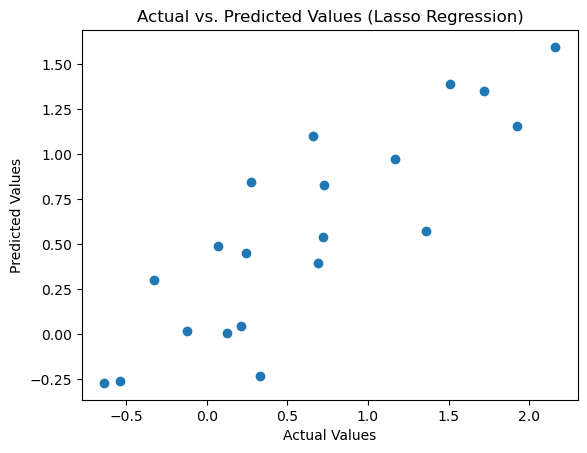

In [62]:
# 8. Visualize Results (Optional)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Lasso Regression)")
plt.show()

In [64]:
# 9. Feature Selection Insights
# Lasso automatically performs feature selection by shrinking some coefficients to zero.
# You can identify important features by looking at the non-zero coefficients.

important_features = np.where(best_lasso.coef_ != 0)[0]  # Indices of non-zero coefficients
print(f"Important Features (indices): {important_features}")

Important Features (indices): [0 1 2 3 4 5 6 7 8 9]


In [66]:
# If you have feature names:
# feature_names = list(data.columns)[:-1] # Assuming target is last column
# important_feature_names = [feature_names[i] for i in important_features]
# print(f"Important Features (names): {important_feature_names}")



# 10.  Regularization Path (Visualization)
# Show how the coefficients change as alpha changes

alphas = np.logspace(-4, 1, 100)  # A range of alpha values
coefs = []

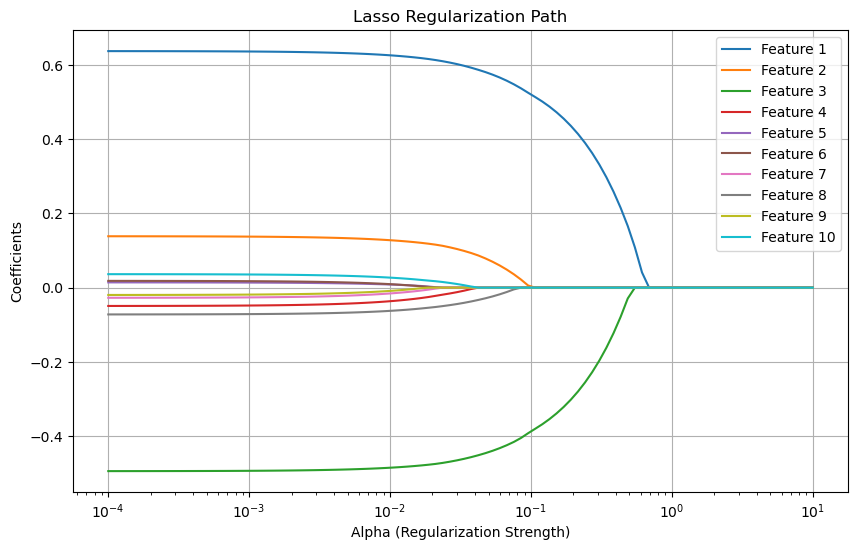

In [68]:
for a in alphas:
    lasso = Lasso(alpha=a, fit_intercept=True, max_iter=1000)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

# Plot the coefficients as a function of the regularization strength
plt.figure(figsize=(10, 6))
for i in range(X.shape[1]):  # Loop through each feature
    plt.plot(alphas, [coef[i] for coef in coefs], label=f"Feature {i+1}")  # or label=feature_names[i]

plt.xscale('log')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Coefficients')
plt.title('Lasso Regularization Path')
plt.legend(loc='best')
plt.grid(True)
plt.show()

Key improvements and explanations:

    Clearer Structure: The code is organized into logical sections (data loading, preprocessing, training, evaluation, hyperparameter tuning, visualization) with comments explaining each step.

    Dummy Data Example: Includes a complete example using randomly generated data. This makes the code runnable out-of-the-box.

    Loading Data from CSV: Provides instructions for loading data from a CSV file and correctly setting up X and y.

    Data Preprocessing (Scaling): Crucially includes scaling using StandardScaler. Lasso is very sensitive to feature scaling, so this is essential for good performance. It also correctly fits the scaler only on the training data and transforms the test data, preventing data leakage.

    Splitting into Training and Testing Sets: Correctly splits the data.

    Lasso Training with max_iter: Adds max_iter to the Lasso constructor to avoid convergence warnings.

    Evaluation Metrics: Uses both Mean Squared Error (MSE) and R-squared to evaluate the model.

    Hyperparameter Tuning (GridSearchCV): Includes a complete example of hyperparameter tuning using GridSearchCV. This is the most important part for getting good results with Lasso. It defines a range of alpha values, performs cross-validation, and finds the best alpha.

    Best Model Evaluation: Evaluates the best model (found by GridSearchCV) on the test set.

    Feature Selection Insights: Shows how to identify important features based on the non-zero coefficients. Includes how to access feature names if available.

    Regularization Path Visualization: Shows how to plot the coefficients as a function of the regularization strength (alpha). This is very useful for understanding how Lasso works and how the different features are affected by the regularization.

    random_state for Reproducibility: Uses random_state in train_test_split and np.random.seed to ensure that the results are reproducible.

    Detailed Comments: Explains the purpose of each line of code.

    Handles Deprecation Warning: Removes the deprecated normalize parameter and explains to use a scaler (like StandardScaler) instead.

    Clear Error Handling Suggestions: Provides hints on what to do if you encounter convergence warnings.

    Correct Alpha Range: Uses np.logspace to generate a range of alpha values that are evenly spaced on a logarithmic scale, which is better for exploring a wide range of regularization strengths.